# ConvNet Abstraction

## Overview

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

# print(sys.path)

import networkx as nx

from graphPlot import drawGraph
from const import *

plt.rcParams['figure.figsize'] = [10, 10]
# print(plt.rcParams['figure.figsize'])

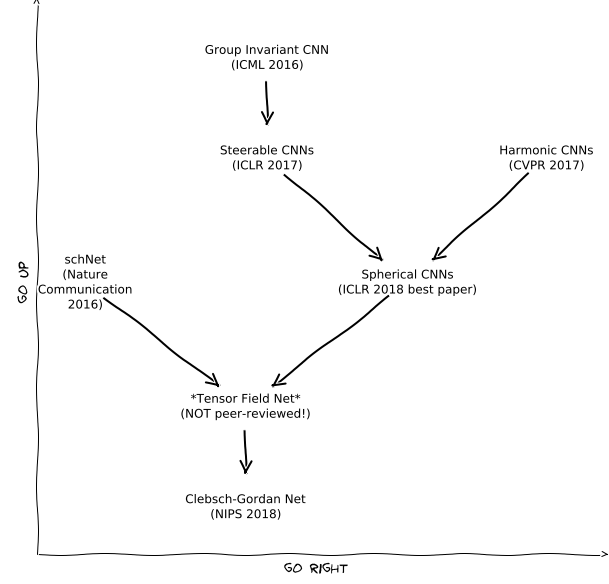

In [9]:

g = nx.DiGraph(directed=True)

schNet = "schNet\n(Nature\nCommunication\n2016)"
groupInv = "Group Invariant CNN\n(ICML 2016)"
steerable = "Steerable CNNs\n(ICLR 2017)"
harmonic = "Harmonic CNNs\n(CVPR 2017)"
spherical = "Spherical CNNs\n(ICLR 2018 best paper)"
tensorField = "*Tensor Field Net*\n(NOT peer-reviewed!)"
cgNet = "Clebsch-Gordan Net\n(NIPS 2018)"

g.add_edge(schNet, tensorField)
g.add_edge(groupInv, steerable)
g.add_edge(harmonic, spherical)
g.add_edge(steerable, spherical)
g.add_edge(spherical, tensorField)
g.add_edge(tensorField, cgNet)

drawGraph(g)

plt.show()

## Pre-ConvNet

1960-1987

[Eternal winter covers the land]

## Pre-ConvNet - Linear Fully Connected Dense (FC) Layer

In pursuing of unbounded representation power


\begin{align}
& \text{(let $w$ be the weight function)} & f_+(x) &= \phi \circ \Big( \int\limits_{x \in \text{Manifold}} f(x) w(x, y) dx \Big) \\
& \text{(pardon me for abusing notation a bit)} & &= \phi \circ \Big( < f(x), w(x, y) > dx \Big)
\end{align}

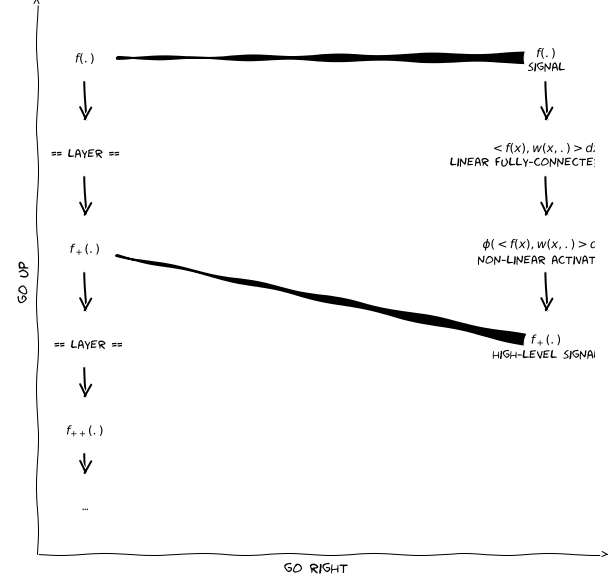

In [8]:


g = nx.DiGraph(directed=True)

g.add_edge("$f(.)$", "== layer ==")
g.add_edge("== layer ==", "$f_+(.)$")
g.add_edge("$f_+(.)$", " == layer ==")
g.add_edge(" == layer ==", "$f_{++}(.)$")
g.add_edge("$f_{++}(.)$", "...")

dot = "$f(.)$\nsignal"
fc = "$<f(x), w(x, .)> d x$\nlinear fully-connected dense"
nl = "$\phi(<f(x), w(x, .)> d x)$\nnon-linear activation"
dot2 = "$f_+(.)$\nhigh-level signal"
# hw = "highway?"

g.add_edge(dot, fc)
g.add_edge(fc, nl)
g.add_edge(nl, dot2)

g2 = g.copy()

g2.add_edge(dot, "$f(.)$", wedge=True)
g2.add_edge(dot2, "$f_+(.)$", wedge=True)

# g.add_edge(dot, hw)
# g.add_edge(hw, dot2)

drawGraph(g2, font='humor sans', layoutG=g)

plt.show()

## Pre-ConvNet - Fully Connected LayersLinear Fully Connected Dense (FC) Layer

Considerably weak in today's standard
- e.g. easily confused by turning its head

## Invariant Layer / Bag of Features?

(DON'T DO THIS)

[picasso effect]

## Data Augmentation

[insert example pictures]

- Sounds like in the right direction
    - maybe a bit slow in practice
    - even in convex case SGD "theoretically probably" converges equally fast
    - but it works fines
- Wait a second, how about a better idea?